<a href="https://colab.research.google.com/github/MirnaHesham/MirnaHesham/blob/main/PatternAnalysis_Q1_new_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Import needed libraries*

In [360]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

!pip install scikit-plot
import scikitplot as skplt


In [361]:
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# *Read the whole data from the file on drive*

In [362]:
data=['feature_1', 'feature_2','feature_3', 'class' ]
holdData = pd.read_csv('/content/drive/MyDrive/Pattern Analysis Data/skin.csv', usecols= data)
feature_1 =  holdData['feature_1']
feature_2 = holdData['feature_2']
feature_3= holdData['feature_3']
className= holdData['class']

In [363]:
feature_1= np.array(feature_1)
feature_2= np.array(feature_2)
feature_3= np.array(feature_3)

Features_123= list(zip(feature_1, feature_2, feature_3))
Features_123 = np.array(Features_123) #converted the 3 featurs to array
className= np.array(className) #converted classLabels to array
dataPoints= len(className)

In [364]:
dataPoints

245057

# *Insights about the data features with graphs and histogram*

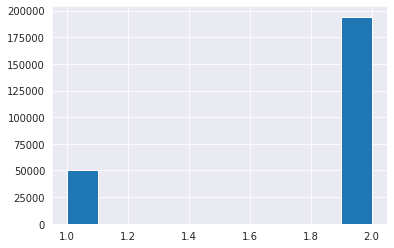

In [365]:
'''dataset is not balanced as seen in the histogram'''
holdData['class'].hist()

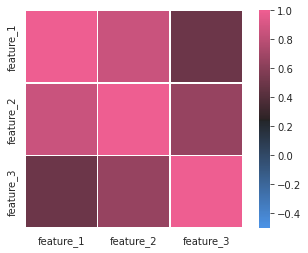

In [366]:
sns.set_style("darkgrid")
corr = holdData.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2) 

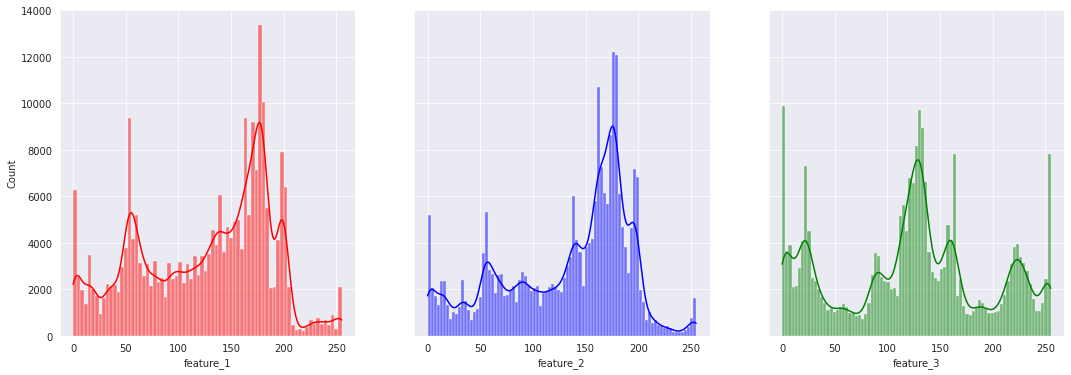

In [367]:
''' mimicing the distribution of the three features to see if it follows Gussian distribution'''

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(holdData, ax=axes[0], x="feature_1", kde=True, color='r')
sns.histplot(holdData, ax=axes[1], x="feature_2", kde=True, color='b')
sns.histplot(holdData, ax=axes[2], x="feature_3", kde=True, color='g') 

# *Splitting the data into train and test.*
*  First 90% of class one 's data to be in train data
*  First 90% of class two 's data to be in train data




In [368]:
countClassOne=0
countClassTwo=0
for i in range(len(className)):
  if className[i]== 1:
    countClassOne+=1
  else:
    countClassTwo+=1

print("countClassOne = ", countClassOne)
print("countClassTwo = ", countClassTwo)
print("length of data  = ", len(className))

countClassOne =  50859
countClassTwo =  194198
length of data  =  245057


In [369]:
className[countClassOne]

2

In [370]:
''' get 90% of the class 1 and 2 to be my train data'''
feature_1_train_C1=[]
feature_2_train_C1=[]
feature_3_train_C1=[]
feature_1_test_C1=[]
feature_2_test_C1=[]
feature_3_test_C1=[]
Class_train_C1=[]
Class_test_C1=[]


PercentC1= int(countClassOne*.9)
print("count size class 1 ",countClassOne)
print("90 perecent of C1 stop at index ",PercentC1)


''' take the first 90 percent of class one as train'''
for i in range (0,PercentC1):
  feature_1_train_C1.append(feature_1[i])
  feature_2_train_C1.append(feature_2[i])
  feature_3_train_C1.append(feature_3[i])
  Class_train_C1.append(className[i])

''' take the last 10 percent of class one till the end of the class index as test dataset'''
for i in range (PercentC1, countClassOne):
  feature_1_test_C1.append(feature_1[i])
  feature_2_test_C1.append(feature_2[i])
  feature_3_test_C1.append(feature_3[i])
  Class_test_C1.append(className[i])


count size class 1  50859
90 perecent of C1 stop at index  45773


In [371]:
feature_1_train_C2=[]
feature_2_train_C2=[]
feature_3_train_C2=[]
feature_1_test_C2=[]
feature_2_test_C2=[]
feature_3_test_C2=[]
Class_train_C2=[]
Class_test_C2=[]

PercentC2= int(countClassTwo*.9)
print("count size class 2 ",countClassTwo)
print("90 perecent of C2 stop at index ",PercentC2)

''' take the first 90 percent of class two as train starting from index 50859, last index where class one exists'''
for i in range (countClassOne,PercentC2):
  feature_1_train_C2.append(feature_1[i])
  feature_2_train_C2.append(feature_2[i])
  feature_3_train_C2.append(feature_3[i])
  Class_train_C2.append(className[i])

for i in range (PercentC2,len(className)):
  feature_1_test_C2.append(feature_1[i])
  feature_2_test_C2.append(feature_2[i])
  feature_3_test_C2.append(feature_3[i])
  Class_test_C2.append(className[i])

print("length feature_1 test+train",len(feature_1_train_C2)+len(feature_1_test_C2))

count size class 2  194198
90 perecent of C2 stop at index  174778
length feature_1 test+train 194198


In [372]:
feature_1_train=[]
feature_2_train=[]
feature_3_train=[]
feature_1_test=[]
feature_2_test=[]
feature_3_test=[]
Class_test=[]

Class_train= Class_train_C1 + Class_train_C2
Class_test= Class_test_C1 + Class_test_C2
feature_1_train= feature_1_train_C1+ feature_1_train_C2
feature_2_train= feature_2_train_C1+ feature_2_train_C2
feature_3_train= feature_3_train_C1+ feature_3_train_C2

feature_1_test= feature_1_test_C1+ feature_1_test_C2
feature_2_test= feature_2_test_C1+ feature_2_test_C2
feature_3_test= feature_3_test_C1+ feature_3_test_C2

print(len(Class_train)+ len(Class_test)) 
print(len(feature_1_train)+ len(feature_1_test)) 
print(len(feature_2_train)+ len(feature_2_test)) 
print(len(feature_3_train)+ len(feature_3_test)) 

245057
245057
245057
245057


In [373]:
TrainSize=len(Class_train)
TestSize= TrainSize=len(Class_test)
print("Length training data = ",TrainSize) 
print("Length Test data = ", TestSize) 
print("Length both added data = ", TestSize +TrainSize) 

Length training data =  75365
Length Test data =  75365
Length both added data =  150730


In [374]:
''' make sure that I splitted the data correctley'''

index= 45772
print(feature_1_train_C1[index])
print(feature_2_train_C1[index])
print(feature_3_train_C1[index])
print(Class_train_C1[index])
print("   ")
print(feature_1_train[index])
print(feature_2_train[index])
print(feature_3_train[index])
print(Class_train[index])

''' make sure that first element in class 2 is the same for all'''
index= 45773
print(feature_1_train[index])
print(feature_2_train[index])
print(feature_3_train[index])
print(Class_train[index])
print("   ")

print(feature_1_train_C2[0])
print(feature_2_train_C2[0])
print(feature_3_train_C2[0])
print(Class_train_C2[0])
print("   ")
print(feature_1[50859])
print(feature_2[50859])
print(feature_3[50859])


97
144
198
1
   
97
144
198
1
198
198
158
2
   
198
198
158
2
   
198
198
158


In [375]:
PriorC1= Class_train.count(1)/ len(Class_train)
PriorC2=Class_train.count(2)/ len(Class_train)
print("Prior Class 1 ", PriorC1)
print("Prior Class 2 ", PriorC2)
print("Prior Class 1+ 2 = ", PriorC1+ PriorC2)

Prior Class 1  0.26974164957688046
Prior Class 2  0.7302583504231195
Prior Class 1+ 2 =  1.0


# *Bayse classifier with Signle features*
1. Feature 1 
2. Feature 2
1. Feature 3


 


In [376]:
Feature_1_trainSet = set(feature_1_train)
Feature_2_trainSet = set(feature_2_train)
Feature_3_trainSet = set(feature_3_train)
print(Feature_1_trainSet)
print(Feature_2_trainSet)
print(Feature_3_trainSet)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [377]:
occurance_feature1_Class_1=[]
occurance_feature1_Class_2=[]

for i in Feature_1_trainSet:
  countClass1=0
  countClass2=0
  for j in range(0,len(feature_1_train)):
    if i== feature_1_train[j] and Class_train[j]==1:
      countClass1+=1
    elif i== feature_1_train[j] and Class_train[j]==2:
      countClass2+=1
  occurance_feature1_Class_1.append(countClass1)
  occurance_feature1_Class_2.append(countClass2)

In [378]:
Feature_1_trainSet=list(Feature_1_trainSet)
print(Feature_1_trainSet[220])
print(occurance_feature1_Class_1)
print(occurance_feature1_Class_2)
print(sum(occurance_feature1_Class_1))
print(sum(occurance_feature1_Class_2)) 
print(sum(occurance_feature1_Class_2) + sum(occurance_feature1_Class_1) )

220
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 5, 4, 7, 12, 13, 27, 21, 32, 44, 67, 89, 118, 129, 200, 232, 282, 324, 330, 348, 372, 371, 442, 468, 447, 465, 504, 498, 480, 483, 463, 438, 389, 343, 355, 283, 271, 209, 186, 185, 151, 177, 187, 199, 192, 229, 237, 222, 211, 253, 281, 310, 330, 324, 312, 254, 248, 184, 154, 123, 178, 193, 207, 234, 278, 290, 326, 411, 464, 453, 448, 455, 401, 361, 345, 344, 337, 281, 245, 252, 249, 259, 283, 287, 298, 287, 310, 289, 325, 369, 310, 306, 286, 344, 329, 329, 343, 299, 379, 355, 311, 333, 330, 304, 303, 321, 321, 313, 266, 267, 220, 272, 320, 321, 363, 374, 400, 383, 426, 439, 526, 597, 564, 537, 538, 395, 304, 334, 290, 378, 302, 224, 202, 226, 203, 228, 212, 286, 335, 423, 398, 397, 396, 333, 327, 303, 194, 182, 150, 110, 87, 65, 36, 27, 21, 7, 17, 14, 13, 19, 16, 23, 15, 26, 25, 28, 41, 40, 46, 66, 83, 113, 156, 173, 155, 141, 122, 100, 113, 64, 65, 38, 17, 18, 10, 8, 3, 4, 1, 2, 2, 2, 1, 3, 3, 

In [379]:
occurance_feature2_Class_1=[]
occurance_feature2_Class_2=[]

for i in Feature_2_trainSet:
  countClass1=0
  countClass2=0
  for j in range(0,len(feature_2_train)):
    if i== feature_2_train[j] and Class_train[j]==1:
      countClass1+=1
    elif i== feature_2_train[j] and Class_train[j]==2:
      countClass2+=1
  occurance_feature2_Class_1.append(countClass1)
  occurance_feature2_Class_2.append(countClass2)

In [380]:
Feature_2_trainSet=list(Feature_2_trainSet)
print(Feature_2_trainSet[220])
print(occurance_feature2_Class_1)
print(occurance_feature2_Class_2)
print(sum(occurance_feature2_Class_1))
print(sum(occurance_feature2_Class_2)) 
print(sum(occurance_feature2_Class_2) + sum(occurance_feature2_Class_1) )

220
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 3, 9, 12, 11, 13, 28, 22, 25, 46, 54, 49, 55, 61, 53, 54, 51, 43, 56, 54, 71, 90, 114, 146, 188, 219, 231, 273, 287, 359, 346, 415, 420, 427, 413, 457, 369, 362, 381, 325, 373, 346, 397, 389, 348, 396, 383, 387, 349, 284, 244, 248, 242, 222, 239, 238, 261, 282, 285, 369, 368, 328, 374, 347, 325, 314, 305, 256, 300, 232, 222, 234, 208, 177, 180, 181, 183, 208, 268, 285, 328, 357, 318, 342, 359, 378, 402, 455, 404, 424, 427, 483, 468, 451, 405, 361, 381, 362, 330, 384, 336, 369, 384, 403, 392, 417, 449, 467, 415, 416, 354, 367, 327, 314, 292, 289, 321, 314, 390, 443, 506, 527, 539, 589, 621, 643, 652, 649, 687, 676, 725, 658, 709, 508, 407, 344, 379, 283, 155, 112, 65, 45, 35, 28, 33, 24, 40, 43, 65, 74, 87, 148, 185, 234, 178, 131, 127, 98, 86, 76, 60, 29, 23, 12, 6, 6, 2, 4, 4, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,

In [381]:
occurance_feature3_Class_1=[]
occurance_feature3_Class_2=[]

for i in Feature_3_trainSet:
  countClass1=0
  countClass2=0
  for j in range(0,len(feature_2_train)):
    if i== feature_3_train[j] and Class_train[j]==1:
      countClass1+=1
    elif i== feature_3_train[j] and Class_train[j]==2:
      countClass2+=1
  occurance_feature3_Class_1.append(countClass1)
  occurance_feature3_Class_2.append(countClass2) 

In [382]:
Feature_3_trainSet=list(Feature_3_trainSet)
print(Feature_3_trainSet[220])
print(occurance_feature3_Class_1)
print(occurance_feature3_Class_2)
print(sum(occurance_feature3_Class_1))
print(sum(occurance_feature3_Class_2)) 
print(sum(occurance_feature3_Class_2) + sum(occurance_feature1_Class_1) )

220
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 5, 5, 8, 5, 3, 3, 6, 8, 17, 14, 36, 70, 98, 151, 154, 192, 248, 279, 332, 366, 338, 302, 294, 210, 171, 161, 149, 152, 178, 188, 191, 207, 245, 237, 228, 259, 231, 213, 216, 280, 277, 258, 310, 301, 305, 307, 262, 297, 247, 275, 233, 182, 175, 142, 143, 122, 172, 184, 149, 174, 171, 217, 242, 275, 251, 229, 210, 204, 203, 165, 193, 217, 220, 234, 210, 272, 249, 273, 271, 288, 273, 233, 270, 233, 236, 214, 187, 189, 161, 142, 165, 162, 163, 154, 126, 134, 151, 142, 166, 215, 242, 265, 292, 368, 413, 489, 543, 645, 659, 809, 918, 982, 955, 1016, 978, 928, 834, 832, 722, 728, 686, 723, 645, 605, 547, 519, 511, 454, 387, 315, 271, 215, 216, 165, 180, 187, 169, 164

In [383]:
likelihood_F1_C1 = [x / sum(occurance_feature1_Class_1) for x in occurance_feature1_Class_1]
print("sum of likelihoods of class 1 for feature 1 : " ,sum(likelihood_F1_C1))
likelihood_F1_C2 = [x / sum(occurance_feature1_Class_2) for x in occurance_feature1_Class_2]
print("sum of likelihoods of class 2 for feature 1 : " ,sum(likelihood_F1_C2))
print("====================================================================")
likelihood_F2_C1 = [x / sum(occurance_feature2_Class_1) for x in occurance_feature2_Class_1]
print("sum of likelihoods of class 1 for feature 2 : " ,sum(likelihood_F2_C1))
likelihood_F2_C2 = [x / sum(occurance_feature2_Class_2) for x in occurance_feature2_Class_2]
print("sum of likelihoods of class 2 for feature 2 : " ,sum(likelihood_F2_C2))
print("====================================================================")
likelihood_F3_C1 = [x / sum(occurance_feature3_Class_1) for x in occurance_feature3_Class_1]
print("sum of likelihoods of class 1 for feature 3 : " ,sum(likelihood_F3_C1))
likelihood_F3_C2 = [x / sum(occurance_feature3_Class_2) for x in occurance_feature3_Class_2]
print("sum of likelihoods of class 2 for feature 3 : " ,sum(likelihood_F3_C2))

sum of likelihoods of class 1 for feature 1 :  1.0000000000000002
sum of likelihoods of class 2 for feature 1 :  1.0000000000000007
sum of likelihoods of class 1 for feature 2 :  1.0000000000000002
sum of likelihoods of class 2 for feature 2 :  1.0000000000000007
sum of likelihoods of class 1 for feature 3 :  0.9999999999999999
sum of likelihoods of class 2 for feature 3 :  1.0


In [384]:
print("Likelihoods of class 1 for feature 1 : " ,likelihood_F1_C1)
print("Likelihoods of class 2 for feature 1 : " ,likelihood_F1_C2)
print("====================================================================")
print("Likelihoods of class 1 for feature 2 : " ,likelihood_F2_C1)
print("Likelihoods of class 2 for feature 2 : " ,likelihood_F2_C2)
print("====================================================================")
print("Likelihoods of class 1 for feature 3 : " ,likelihood_F3_C1)
print("Likelihoods of class 2 for feature 3 : " ,likelihood_F3_C2)

Likelihoods of class 1 for feature 1 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.184694033600594e-05, 2.184694033600594e-05, 8.738776134402376e-05, 0.00010923470168002972, 8.738776134402376e-05, 0.0001529285823520416, 0.0002621632840320713, 0.00028401022436807724, 0.0005898673890721604, 0.00045878574705612477, 0.0006991020907521901, 0.0009612653747842615, 0.001463745002512398, 0.0019443776899045289, 0.0025779389596487013, 0.0028182553033447664, 0.004369388067201188, 0.005068490157953379, 0.006160837174753676, 0.007078408668865925, 0.007209490310881961, 0.007602735236930068, 0.00812706180499421, 0.008105214864658204, 0.009656347628514627, 0.010224368077250781, 0.009765582330194656, 0.010158827256242764, 0.011010857929346994, 0.01087977628733096, 0.010486531361282853, 0.01055207218229087, 0.010115133375570752, 0.009568959867170603, 0.008498459790706311, 0.007493500535250038, 0.0077556638192821095,

In [385]:
''' probability of x= f(x|C1) * f(C1) + f(x|C2) * P(C2)'''
prob_x_f1=[]
prob_x_f2=[]
prob_x_f3=[]
for i in range(0, len(Feature_1_trainSet)):
  prob_x_f1.append(       ( PriorC1 *likelihood_F1_C1[i])  +   ( PriorC2 *likelihood_F1_C2[i])    )

for i in range(0, len(Feature_2_trainSet)):
  prob_x_f2.append(       ( PriorC1 *likelihood_F2_C1[i])  +   ( PriorC2 *likelihood_F2_C2[i])    )

for i in range(0, len(Feature_3_trainSet)):
  prob_x_f3.append(       ( PriorC1 *likelihood_F3_C1[i])  +   ( PriorC2 *likelihood_F3_C2[i])    )

In [386]:
print("Probability of x (feature_1)")
print(prob_x_f1)
print("=============================================")
print("Probability of x (feature_2)")
print(prob_x_f2)
print("=============================================")
print("Probability of x (feature_3)")
print(prob_x_f3)

Probability of x (feature_1)
[0.005268368573651085, 0.0018739834523725336, 0.004903000730735686, 0.003765645993918393, 0.004861749522664592, 0.003217594229545293, 0.002522216722061146, 0.0023041746222567947, 0.002180420998043514, 0.0019505928387902787, 0.0018209461848525562, 0.0019918440468613724, 0.0020272022252080238, 0.0022157791763901652, 0.0028934775947009874, 0.006164109091766258, 0.005916601843339697, 0.003258845437616387, 0.002922942743323197, 0.0029995521297409423, 0.004767461047073521, 0.002268816443910143, 0.0023807840086745398, 0.0021214907007990947, 0.001756122857883695, 0.0015498668175282274, 0.0015439737878037854, 0.0013789689555194116, 0.001414327133866063, 0.0019329137496169528, 0.0019270207198925108, 0.0027107936732432875, 0.004737995898451312, 0.003341347853758574, 0.003836362350611696, 0.004602456214789147, 0.003282417556514155, 0.00348278056714518, 0.003082054545883129, 0.0029111566838743133, 0.0028404403271810098, 0.0027815100299365906, 0.0031586639323008744, 0.00

In [387]:
Posterior_C1_F1=[]
Posterior_C2_F1=[]
Posterior_C1_F2=[]
Posterior_C2_F2=[]
Posterior_C1_F3=[]
Posterior_C2_F3=[]

for i in range(0,len(likelihood_F1_C1)):
  result = (PriorC1 * likelihood_F1_C1[i]) /prob_x_f1[i]
  Posterior_C1_F1.append(result )

for i in range(0,len(likelihood_F1_C2)):
  result = (PriorC2 * likelihood_F1_C2[i]) /prob_x_f1[i]
  Posterior_C2_F1.append(result )


for i in range(0,len(likelihood_F2_C1)):
  result = (PriorC1 * likelihood_F2_C1[i]) /prob_x_f2[i]
  Posterior_C1_F2.append(result )

for i in range(0,len(likelihood_F2_C2)):
  result = (PriorC2 * likelihood_F2_C2[i]) /prob_x_f2[i]
  Posterior_C2_F2.append(result )


for i in range(0,len(likelihood_F3_C1)):
  result = (PriorC1 * likelihood_F3_C1[i]) /prob_x_f3[i]
  Posterior_C1_F3.append(result )

for i in range(0,len(likelihood_F3_C2)):
  result = (PriorC2 * likelihood_F3_C2[i]) /prob_x_f3[i]
  Posterior_C2_F3.append(result )

In [388]:
print("Posterior of class 1 Given feature_1")
print(Posterior_C1_F1)
print("Posterior of class 2 Given feature_1")
print(Posterior_C2_F1)

print("Posterior of class 1 Given feature_2")
print(Posterior_C1_F2)
print("Posterior of class 2 Given feature_2")
print(Posterior_C2_F2)

print("Posterior of class 1 Given feature_3")
print(Posterior_C1_F3)
print("Posterior of class 2 Given feature_3")
print(Posterior_C2_F3)


Posterior of class 1 Given feature_1
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003816793893129771, 0.004273504273504273, 0.016666666666666666, 0.015243902439024393, 0.012232415902140673, 0.015217391304347828, 0.014925373134328358, 0.022927689594356263, 0.041474654377880185, 0.02688860435339309, 0.05745062836624775, 0.07445008460236888, 0.1281070745697897, 0.18016194331983804, 0.2448132780082988, 0.2733050847457627, 0.3731343283582089, 0.4241316270566728, 0.46229508196721314, 0.5151033386327504, 0.5436573311367381, 0.518628912071535, 0.5454545454545455, 0.4464500601684717, 0.40476190476190477, 0.3564356435643565, 0.35224586288416077, 0.29008109794136, 0.4300341296928328, 0.49355797819623387, 0.503672612801679, 0.5127388535031847, 0.51731843575419, 0.5177304964539007, 0.45232558139534884, 0.35360824742268043, 0.3456669912366115, 0.3223234624145786, 0.356578947368421, 0.30825958702064904, 0.28926905

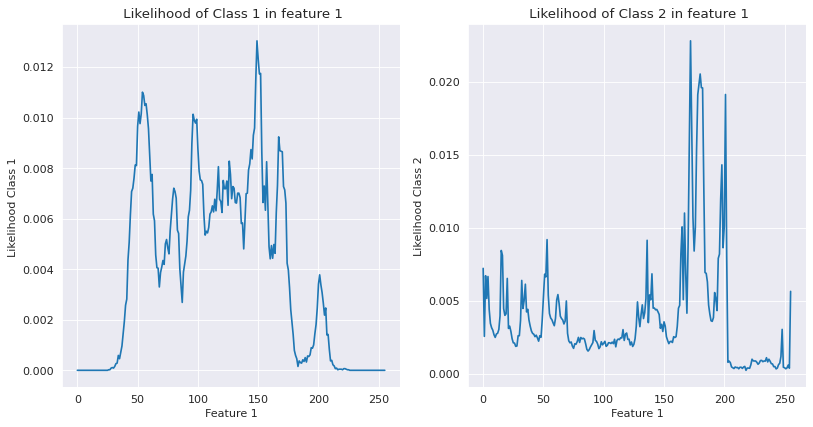

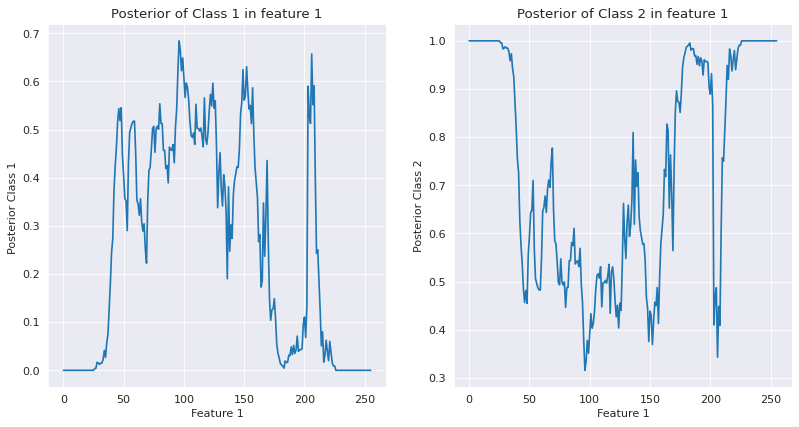

In [389]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_1_trainSet, likelihood_F1_C1)
plt.title(" Likelihood of Class 1 in feature 1")
plt.xlabel('Feature 1')
plt.ylabel('Likelihood Class 1 ')

plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_1_trainSet, likelihood_F1_C2)
plt.title(" Likelihood of Class 2 in feature 1")
plt.xlabel('Feature 1')
plt.ylabel('Likelihood Class 2')
plt.show()



figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_1_trainSet, Posterior_C1_F1)
plt.title("Posterior of Class 1 in feature 1")
plt.xlabel('Feature 1')
plt.ylabel('Posterior Class 1 ')

plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_1_trainSet, Posterior_C2_F1)
plt.title("Posterior of Class 2 in feature 1")
plt.xlabel('Feature 1')
plt.ylabel('Posterior Class 2')
plt.show()

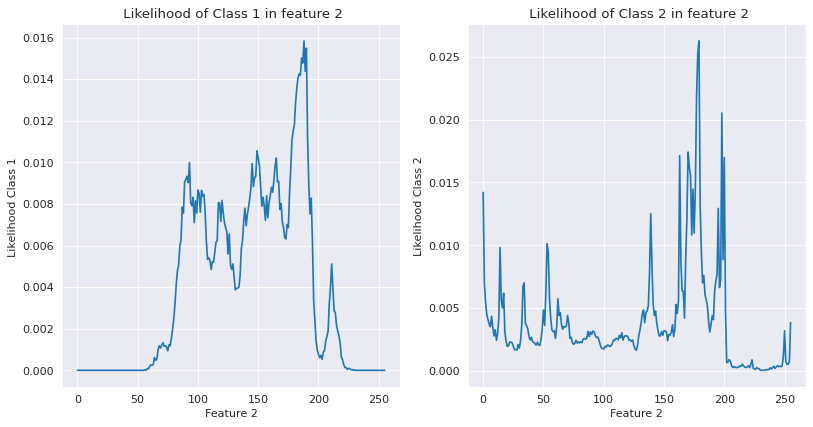

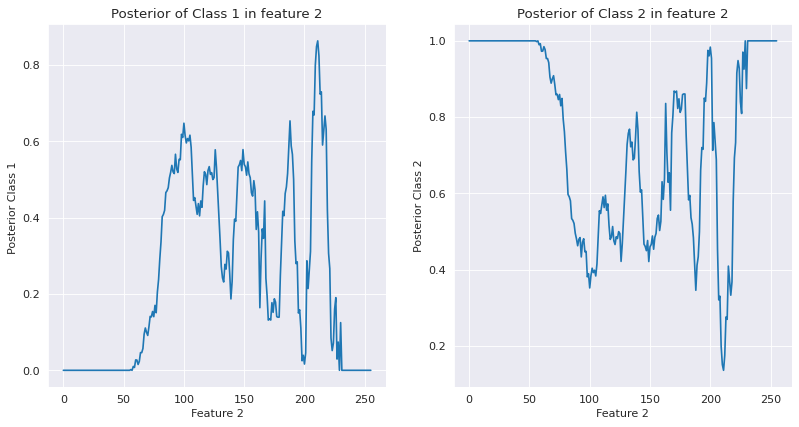

In [390]:
figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_2_trainSet, likelihood_F2_C1)
plt.title(" Likelihood of Class 1 in feature 2")
plt.xlabel('Feature 2')
plt.ylabel('Likelihood Class 1 ')

plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_2_trainSet, likelihood_F2_C2)
plt.title(" Likelihood of Class 2 in feature 2")
plt.xlabel('Feature 2')
plt.ylabel('Likelihood Class 2')
plt.show()


figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_2_trainSet, Posterior_C1_F2)
plt.title("Posterior of Class 1 in feature 2")
plt.xlabel('Feature 2')
plt.ylabel('Posterior Class 1 ')

plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_2_trainSet, Posterior_C2_F2)
plt.title("Posterior of Class 2 in feature 2")
plt.xlabel('Feature 2')
plt.ylabel('Posterior Class 2')
plt.show()

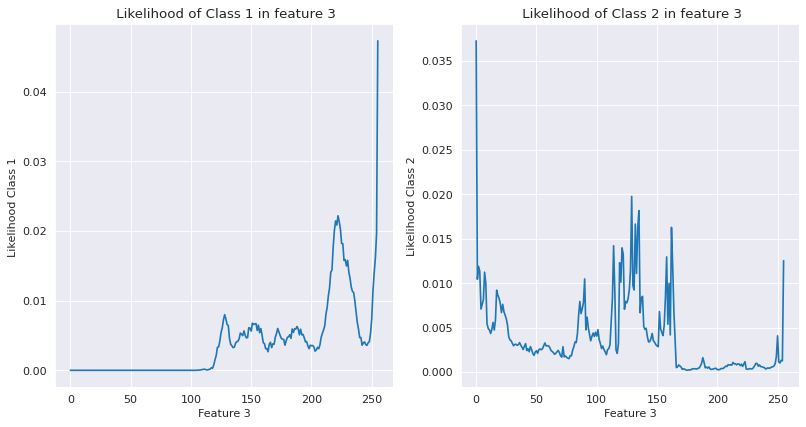

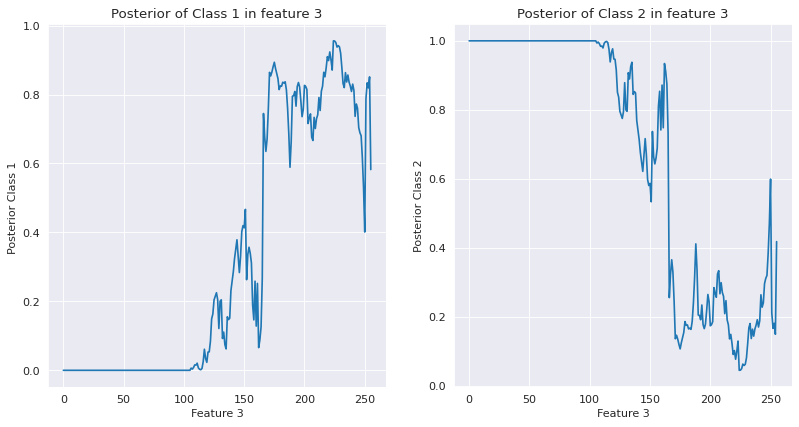

In [391]:
figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_3_trainSet, likelihood_F3_C1)
plt.title(" Likelihood of Class 1 in feature 3")
plt.xlabel('Feature 3')
plt.ylabel('Likelihood Class 1 ')

plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_3_trainSet, likelihood_F3_C2)
plt.title(" Likelihood of Class 2 in feature 3")
plt.xlabel('Feature 3')
plt.ylabel('Likelihood Class 2')
plt.show()


figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_3_trainSet, Posterior_C1_F3)
plt.title("Posterior of Class 1 in feature 3")
plt.xlabel('Feature 3')
plt.ylabel('Posterior Class 1 ')

plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_3_trainSet, Posterior_C2_F3)
plt.title("Posterior of Class 2 in feature 3")
plt.xlabel('Feature 3')
plt.ylabel('Posterior Class 2')
plt.show()

In [392]:
print("Making sure that sum of posterior of specific x should = 1 ")
print(Posterior_C1_F1[0] + Posterior_C2_F1[0])
print(Posterior_C1_F2[0] + Posterior_C2_F2[0])
print(Posterior_C1_F3[0] + Posterior_C2_F3[0])

print(Posterior_C1_F1[50])
print(Posterior_C2_F1[50])


Making sure that sum of posterior of specific x should = 1 
1.0
1.0
1.0
0.40476190476190477
0.5952380952380952


Number of correctley predicted classes =  58206
Number of wrongly predicted classes =  17159
Accuracy =  0.7723213693358987
correctley classified points ratio of class 1 =  0.4903657097915847
correctley classified points ratio of class 2 =  0.7927261344071487
CC R1=  2494
CC R2=  55712
WC R1=  2592
WC R2=  14567


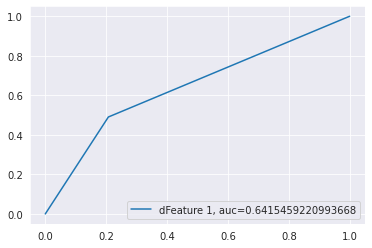

In [393]:
'''now to predict the test dataset using feature 1 only, we shall use the posteriors of train data'''
Predicted_Classes_1=[]
CCR1=0
CCR2=0
WCR1=0
WCR2=0
for i in feature_1_test:
  if Posterior_C1_F1[i]> Posterior_C2_F1[i]:
    predicted=1
  else:
    predicted=2
  Predicted_Classes_1.append(predicted)

Correct_Tested_F1=0
Wrong_Tested_F1=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_1[i]:
    Correct_Tested_F1+=1
    if Class_test[i]==1:
      CCR1+=1
    else:
      CCR2+=1
  else:
    Wrong_Tested_F1+=1
    if Class_test[i]==1:
      WCR1+=1
    else:
      WCR2+=1

print("Number of correctley predicted classes = ", Correct_Tested_F1)
print("Number of wrongly predicted classes = ", Wrong_Tested_F1)
print("Accuracy = ", Correct_Tested_F1/ TestSize)
MCCR1=CCR1/ (WCR1+ CCR1)
MCCR2= CCR2/ (WCR2+ CCR2)
print("correctley classified points ratio of class 1 = ",MCCR1 )
print("correctley classified points ratio of class 2 = ",MCCR2 )

print("CC R1= ",CCR1)
print("CC R2= ",CCR2)
print("WC R1= ",WCR1)
print("WC R2= ",WCR2)

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_1)):
  if Predicted_Classes_1[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)



fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="dFeature 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Number of correctley predicted classes =  64244
Number of wrongly predicted classes =  11121
Accuracy usign only feature_2=  0.8524381344125257
correctley classified points ratio of class 1 =  0.35096342902084154
correctley classified points ratio of class 2 =  0.8887292078714837


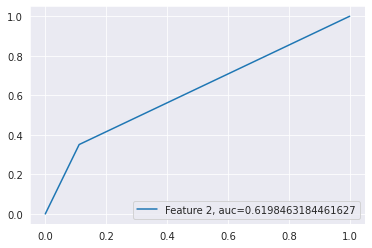

In [394]:
'''now to predict the test dataset using feature 2, we shall use the posteriors of train data'''
Predicted_Classes_2=[]
CCR1_F2=0
CCR2_F2=0
WCR1_F2=0
WCR2_F2=0

for i in feature_2_test:
  if Posterior_C1_F2[i]> Posterior_C2_F2[i]:
    predicted=1
  else:
    predicted=2
  Predicted_Classes_2.append(predicted)

Correct_Tested_F2=0
Wrong_Tested_F2=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_2[i]:
    Correct_Tested_F2+=1
    if Class_test[i]==1:
      CCR1_F2+=1
    else:
      CCR2_F2+=1
  else:
    Wrong_Tested_F2+=1
    if Class_test[i]==1:
      WCR1_F2+=1
    else:
      WCR2_F2+=1

print("Number of correctley predicted classes = ", Correct_Tested_F2)
print("Number of wrongly predicted classes = ", Wrong_Tested_F2)
print("Accuracy usign only feature_2= ", Correct_Tested_F2/ TestSize)
print("correctley classified points ratio of class 1 = ", CCR1_F2/ (WCR1_F2+ CCR1_F2))
print("correctley classified points ratio of class 2 = ", CCR2_F2/ (WCR2_F2+ CCR2_F2))

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_2)):
  if Predicted_Classes_2[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Feature 2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Number of correctley predicted classes =  64386
Number of wrongly predicted classes =  10979
Accuracy usign only feature 3 =  0.8543222981490082
correctley classified points ratio of class 1 =  1.0
correctley classified points ratio of class 2 =  0.8437797919719974


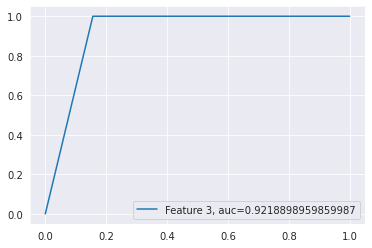

In [395]:
'''now to predict the test dataset using feature 3, we shall use the posteriors of train data'''
Predicted_Classes_3=[]
CCR1_F3=0
CCR2_F3=0
WCR1_F3=0
WCR2_F3=0

for i in feature_3_test:
  if Posterior_C1_F3[i]> Posterior_C2_F3[i]:
    predicted=1
  else:
    predicted=2
  Predicted_Classes_3.append(predicted)

Correct_Tested_F3=0
Wrong_Tested_F3=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_3[i]:
    Correct_Tested_F3+=1
    if Class_test[i]==1:
      CCR1_F3+=1
    else:
      CCR2_F3+=1
  else:
    Wrong_Tested_F3+=1
    if Class_test[i]==1:
      WCR1_F3+=1
    else:
      WCR2_F3+=1

print("Number of correctley predicted classes = ", Correct_Tested_F3)
print("Number of wrongly predicted classes = ", Wrong_Tested_F3)
print("Accuracy usign only feature 3 = ", Correct_Tested_F3/ TestSize)
print("correctley classified points ratio of class 1 = ", CCR1_F3/ (WCR1_F3+ CCR1_F3))
print("correctley classified points ratio of class 2 = ", CCR2_F3/ (WCR2_F3+ CCR2_F3))


updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_3)):
  if Predicted_Classes_3[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Feature 3, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# *Bayse classifier with Paired Features*
1. Feature 1 and Feature 2
2. Feature 1 and Feature 3
1. Feature 2 and Feature 3





In [396]:
'''concatinating features 1 and 2 as train data'''
Feature_12_trainSet=[]
carry=[]
for i in range(0, len(feature_1_train)):
  carry.append(feature_1_train[i])
  carry.append(feature_2_train[i])
  Feature_12_trainSet.append(carry)
  carry=[]

print(Feature_12_trainSet)
print(feature_1_train[0])
print(feature_2_train[0])

'''concatinating features 1 and 2 as test data'''
Feature_12_testSet=[]
carry=[]
for i in range(0, len(feature_1_test)):
  carry.append(feature_1_test[i])
  carry.append(feature_2_test[i])
  Feature_12_testSet.append(carry)
  carry=[]

print(Feature_12_testSet)
print(feature_1_test[0])
print(feature_2_test[0])

[[74, 85], [73, 84], [72, 83], [70, 81], [70, 81], [69, 80], [70, 81], [70, 81], [76, 87], [76, 87], [77, 88], [77, 88], [77, 88], [78, 89], [77, 85], [78, 86], [78, 86], [77, 85], [76, 84], [77, 85], [80, 88], [83, 91], [83, 91], [84, 92], [84, 92], [83, 91], [80, 88], [78, 86], [78, 86], [79, 87], [78, 86], [79, 87], [81, 89], [82, 90], [83, 91], [82, 90], [81, 89], [81, 89], [84, 92], [81, 89], [79, 87], [79, 87], [82, 90], [83, 91], [82, 90], [78, 88], [79, 89], [78, 90], [79, 91], [80, 92], [80, 92], [80, 92], [80, 92], [79, 91], [83, 95], [82, 94], [81, 93], [80, 92], [78, 90], [77, 89], [76, 88], [73, 88], [75, 90], [75, 90], [78, 88], [79, 87], [80, 86], [78, 85], [75, 84], [69, 85], [61, 82], [152, 179], [144, 176], [146, 180], [156, 185], [164, 190], [165, 189], [168, 190], [168, 189], [170, 190], [175, 195], [180, 201], [187, 203], [192, 207], [194, 208], [196, 209], [205, 214], [206, 215], [207, 215], [210, 217], [215, 217], [217, 220], [220, 222], [221, 224], [222, 228], [

In [ ]:
'''concatinating features 1 and 3 as train data'''
Feature_13_trainSet=[]
carry=[]
for i in range(0, len(feature_1_train)):
  carry.append(feature_1_train[i])
  carry.append(feature_3_train[i])
  Feature_13_trainSet.append(carry)
  carry=[]

print(Feature_13_trainSet)
print(feature_1_train[0])
print(feature_3_train[0])


'''concatinating features 1 and 3 as test data'''
Feature_13_testSet=[]
carry=[]
for i in range(0, len(feature_1_test)):
  carry.append(feature_1_test[i])
  carry.append(feature_3_test[i])
  Feature_13_testSet.append(carry)
  carry=[]

print(Feature_13_testSet)
print(feature_1_test[0])
print(feature_2_test[0])


In [ ]:
'''concatinating features 2 and 3 as train set'''
Feature_23_trainSet=[]
carry=[]
for i in range(0, len(feature_2_train)):
  carry.append(feature_2_train[i])
  carry.append(feature_3_train[i])
  Feature_23_trainSet.append(carry)
  carry=[]

print(Feature_23_trainSet)
print(feature_2_train[0])
print(feature_3_train[0])


'''concatinating features 2 and 3 as test'''
Feature_23_testSet=[]
carry=[]
for i in range(0, len(feature_2_test)):
  carry.append(feature_2_test[i])
  carry.append(feature_3_test[i])
  Feature_23_testSet.append(carry)
  carry=[]

print(Feature_23_testSet)
print(feature_2_test[0])
print(feature_3_test[0])

In [ ]:
# # plot the data

# fig = plt.figure(figsize=(30, 20), dpi=80)
# ax = fig.add_subplot(111)
# # plot x,y data with c as the color vector, set the line width of the markers to 0
# ax.scatter(feature_1_train, feature_2_train, c=Class_train, lw=0)


# fig = plt.figure(figsize=(30, 20), dpi=80)
# ax = fig.add_subplot(111)
# # plot x,y data with c as the color vector, set the line width of the markers to 0
# ax.scatter(feature_1_train, feature_3_train, c=Class_train, lw=0)


# fig = plt.figure(figsize=(30, 20), dpi=80)
# ax = fig.add_subplot(111)
# # plot x,y data with c as the color vector, set the line width of the markers to 0
# ax.scatter(feature_2_train, feature_3_train, c=Class_train, lw=0,)

In [ ]:
# following naiive bayse rule: P(Class=W |Feature=x and y) = P(Feature=x|Class=W) * P(Feature=y|Class=W) 
# This means  Likelohood of(Feature=x and y| class=W) =  Likelohood of (Feature=x|Class=W) * Likelohood of (Feature=x|Class=W) 

likelihood_F12_C1=[]
for i in range(0,len(occurance_feature1_Class_1)):
  current=likelihood_F1_C1[i]*likelihood_F2_C1[i]
  likelihood_F12_C1.append(current)

likelihood_F12_C2=[]
for i in range(0,len(occurance_feature1_Class_1)):
  current=likelihood_F1_C2[i]*likelihood_F2_C2[i]
  likelihood_F12_C2.append(current)


likelihood_F13_C1=[]
for i in range(0,len(occurance_feature1_Class_1)):
  current=likelihood_F1_C1[i]*likelihood_F3_C1[i]
  likelihood_F13_C1.append(current)

likelihood_F13_C2=[]
for i in range(0,len(occurance_feature1_Class_1)):
  current=likelihood_F1_C2[i]*likelihood_F3_C2[i]
  likelihood_F13_C2.append(current)


likelihood_F23_C1=[]
for i in range(0,len(occurance_feature2_Class_1)):
  current=likelihood_F2_C1[i]*likelihood_F3_C1[i]
  likelihood_F23_C1.append(current)

likelihood_F23_C2=[]
for i in range(0,len(occurance_feature1_Class_1)):
  current=likelihood_F2_C2[i]*likelihood_F3_C2[i]
  likelihood_F23_C2.append(current)

In [ ]:
print("Likelihoods of class 1 for feature 1 and 2 : " ,likelihood_F12_C1)
print("Likelihoods of class 2 for feature 1 and 2 : " ,likelihood_F12_C2)
print("====================================================================")
print("Likelihoods of class 1 for feature 1 and 3 : " ,likelihood_F13_C1)
print("Likelihoods of class 2 for feature 1 and 3 : " ,likelihood_F13_C2)
print("====================================================================")
print("Likelihoods of class 1 for feature 2 and 3 : " ,likelihood_F23_C1)
print("Likelihoods of class 2 for feature 2 and 3 : " ,likelihood_F23_C2)

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, likelihood_F12_C1, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, likelihood_F12_C1, cmap='Green');
ax.set_title("Likelihood of Class 1 in feature 1 and 2")

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Likelihood');

fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, likelihood_F12_C2, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, likelihood_F12_C2, cmap='Green');
ax.set_title("Likelihood of Class 2 in feature 1 and 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Likelihood');

In [ ]:
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_3_trainSet, likelihood_F13_C1, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_3_trainSet, likelihood_F13_C1, cmap='Green');
ax.set_title("Likelihood of Class 1 in feature 1 and 3")

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Likelihood');

fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_3_trainSet, likelihood_F13_C2, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_3_trainSet, likelihood_F13_C2, cmap='Green');
ax.set_title("Likelihood of Class 2 in feature 1 and 3")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Likelihood');

In [ ]:
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_2_trainSet, Feature_3_trainSet, likelihood_F23_C1, 'red')
ax.scatter3D(Feature_2_trainSet, Feature_3_trainSet, likelihood_F23_C1, cmap='Green');
ax.set_title("Likelihood of Class 1 in feature 2 and 3")

ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Likelihood');

fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_2_trainSet, Feature_3_trainSet, likelihood_F23_C2, 'red')
ax.scatter3D(Feature_2_trainSet, Feature_3_trainSet, likelihood_F23_C2, cmap='Green');
ax.set_title("Likelihood of Class 2 in feature 2 and 3")
ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Likelihood');

In [ ]:
Posterior_C1_F12=[]
Posterior_C2_F12=[]
Posterior_C1_F13=[]
Posterior_C2_F13=[]
Posterior_C1_F23=[]
Posterior_C2_F23=[]

for i in range(0,len(likelihood_F12_C1)):
  result = (PriorC1 * likelihood_F12_C1[i])
  Posterior_C1_F12.append(result )

for i in range(0,len(likelihood_F12_C2)):
  result = (PriorC2 * likelihood_F12_C2[i])
  Posterior_C2_F12.append(result )


for i in range(0,len(likelihood_F13_C1)):
  result = (PriorC1 * likelihood_F13_C1[i])
  Posterior_C1_F13.append(result )

for i in range(0,len(likelihood_F13_C2)):
  result = (PriorC2 * likelihood_F13_C2[i]) 
  Posterior_C2_F13.append(result )


for i in range(0,len(likelihood_F23_C1)):
  result = (PriorC1 * likelihood_F23_C1[i]) 
  Posterior_C1_F23.append(result )

for i in range(0,len(likelihood_F23_C2)):
  result = (PriorC2 * likelihood_F23_C2[i]) 
  Posterior_C2_F23.append(result )

In [ ]:
print("Posterior of class 1 Given feature_1 and feature_2")
print(Posterior_C1_F12)
print("Posterior of class 2 Given feature_1 and feature_2")
print(Posterior_C2_F12)
print("=============================================")

print("Posterior of class 1 Given feature_1 and feature_3")
print(Posterior_C1_F13)
print("Posterior of class 2 Given feature_1 and feature_3")
print(Posterior_C2_F13)
print("=============================================")

print("Posterior of class 1 Given feature_2 and feature_3")
print(Posterior_C1_F23)
print("Posterior of class 2 Given feature_2 and feature_3")
print(Posterior_C2_F23)


In [ ]:
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, Posterior_C1_F12, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, Posterior_C1_F12, cmap='Green');
ax.set_title("Posterior of Class 1 in feature 1 and 2")

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Posterior Probability');

fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, Posterior_C2_F12, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, Posterior_C2_F12, cmap='Green');
ax.set_title("Posterior of Class 2 in feature 1 and 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Posterior Probability');

In [ ]:
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_3_trainSet, Posterior_C1_F13, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_3_trainSet, Posterior_C1_F13, cmap='Green');
ax.set_title("Posterior of Class 1 in feature 1 and 3")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Posterior Probability');

fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_3_trainSet, Posterior_C2_F13, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_3_trainSet, Posterior_C2_F13, cmap='Green');
ax.set_title("Posterior of Class 2 in feature 1 and 3")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Posterior Probability');

In [ ]:
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_2_trainSet, Feature_3_trainSet, Posterior_C1_F23, 'red')
ax.scatter3D(Feature_2_trainSet, Feature_3_trainSet, Posterior_C1_F23, cmap='Green');
ax.set_title("Posterior of Class 1 in feature 2 and 3")
ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Posterior Probability');

fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_2_trainSet, Feature_3_trainSet, Posterior_C2_F23, 'red')
ax.scatter3D(Feature_2_trainSet, Feature_3_trainSet, Posterior_C2_F23, cmap='Green');
ax.set_title("Posterior of Class 2 in feature 1 and 3")
ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Posterior Probability');

In [ ]:
'''now to predict the test dataset using feature 2, we shall use the posteriors of train data'''
Predicted_Classes_12=[]
CCR1_F12=0
CCR2_F12=0
WCR1_F12=0
WCR2_F12=0

for i in Feature_12_testSet:
  PosteriorClass1= likelihood_F1_C1[i[0]] * likelihood_F2_C1[i[1]] * PriorC1
  PosteriorClass2= likelihood_F1_C2[i[0]] * likelihood_F2_C2[i[1]] * PriorC2
  if PosteriorClass1> PosteriorClass2: 
    predicted=1
  else:
    predicted=2
  Predicted_Classes_12.append(predicted)


Correct_Tested_F12=0
Wrong_Tested_F12=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_12[i]:
    Correct_Tested_F12+=1
    if Class_test[i]==1:
      CCR1_F12+=1
    else:
      CCR2_F12+=1
  else:
    Wrong_Tested_F12+=1
    if Class_test[i]==1:
      WCR1_F12+=1
    else:
      WCR2_F12+=1

print("Number of correctley predicted classes = ", Correct_Tested_F12)
print("Number of wrongly predicted classes = ", Wrong_Tested_F12)
print("Accuracy usign only features 1 2= ", Correct_Tested_F12/ TestSize)
print("correctley classified points ratio of class 1 = ", CCR1_F12/ (WCR1_F12+ CCR1_F12))
print("correctley classified points ratio of class 2 = ", CCR2_F12/ (WCR2_F12+ CCR2_F12))

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_12)):
  if Predicted_Classes_12[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Feature 1 and 2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
'''now to predict the test dataset using feature 2, we shall use the posteriors of train data'''
Predicted_Classes_13=[]
CCR1_F13=0
CCR2_F13=0
WCR1_F13=0
WCR2_F13=0

for i in Feature_13_testSet:
  PosteriorClass1= likelihood_F1_C1[i[0]] * likelihood_F3_C1[i[1]] * PriorC1
  PosteriorClass2= likelihood_F1_C2[i[0]] * likelihood_F3_C2[i[1]] * PriorC2
  if PosteriorClass1> PosteriorClass2: 
    predicted=1
  else:
    predicted=2
  Predicted_Classes_13.append(predicted)


Correct_Tested_F13=0
Wrong_Tested_F13=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_13[i]:
    Correct_Tested_F13+=1
    if Class_test[i]==1:
      CCR1_F13+=1
    else:
      CCR2_F13+=1
  else:
    Wrong_Tested_F13+=1
    if Class_test[i]==1:
      WCR1_F13+=1
    else:
      WCR2_F13+=1

print("Number of correctley predicted classes = ", Correct_Tested_F13)
print("Number of wrongly predicted classes = ", Wrong_Tested_F13)
print("Accuracy usign  features 1 3= ", Correct_Tested_F13/ TestSize)
print("correctley classified points ratio of class 1 = ", CCR1_F13/ (WCR1_F13+ CCR1_F13))
print("correctley classified points ratio of class 2 = ", CCR2_F13/ (WCR2_F13+ CCR2_F13))

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_13)):
  if Predicted_Classes_13[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Feature 1 and 3, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
'''now to predict the test dataset using feature 2, we shall use the posteriors of train data'''
Predicted_Classes_23=[]
CCR1_F23=0
CCR2_F23=0
WCR1_F23=0
WCR2_F23=0

for i in Feature_23_testSet:
  PosteriorClass1= likelihood_F2_C1[i[0]] * likelihood_F3_C1[i[1]] * PriorC1
  PosteriorClass2= likelihood_F2_C2[i[0]] * likelihood_F3_C2[i[1]] * PriorC2
  if PosteriorClass1> PosteriorClass2: 
    predicted=1
  else:
    predicted=2
  Predicted_Classes_23.append(predicted)


Correct_Tested_F23=0
Wrong_Tested_F23=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_23[i]:
    Correct_Tested_F23+=1
    if Class_test[i]==1:
      CCR1_F23+=1
    else:
      CCR2_F23+=1
  else:
    Wrong_Tested_F23+=1
    if Class_test[i]==1:
      WCR1_F23+=1
    else:
      WCR2_F23+=1

print("Number of correctley predicted classes = ", Correct_Tested_F23)
print("Number of wrongly predicted classes = ", Wrong_Tested_F23)
print("Accuracy usign only feature_2= ", Correct_Tested_F23/ TestSize)
print("correctley classified points ratio of class 1 = ", CCR1_F23/ (WCR1_F23+ CCR1_F23))
print("correctley classified points ratio of class 2 = ", CCR2_F23/ (WCR2_F23+ CCR2_F23))

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_23)):
  if Predicted_Classes_23[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Feature 2 and 3, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# Bayse Classifier with the three features



In [ ]:
'''concatinating features 1 2 and 3 as train set'''
Feature_123_trainSet=[]
carry=[]
for i in range(0, len(feature_1_train)):
  carry.append(feature_1_train[i])
  carry.append(feature_2_train[i])
  carry.append(feature_3_train[i])
  Feature_123_trainSet.append(carry)
  carry=[]

print(Feature_123_trainSet[0])
print(feature_1_train[0])
print(feature_2_train[0])
print(feature_3_train[0])

'''concatinating features 1 2 and 3  as test'''
Feature_123_testSet=[]
carry=[]
for i in range(0, len(feature_1_test)):
  carry.append(feature_1_test[i])
  carry.append(feature_2_test[i])
  carry.append(feature_3_test[i])
  Feature_123_testSet.append(carry)
  carry=[]

print(Feature_123_testSet[0])
print(feature_1_test[0])
print(feature_2_test[0])
print(feature_3_test[0])

In [ ]:
# following naiive bayse rule: P(Class=W |Feature=x and y) = P(Feature=x|Class=W) * P(Feature=y|Class=W) 
# This means  Likelohood of(Feature=x and y| class=W) =  Likelohood of (Feature=x|Class=W) * Likelohood of (Feature=x|Class=W) 

likelihood_F123_C1=[]
for i in range(0,len(occurance_feature1_Class_1)):
  current=likelihood_F1_C1[i]*likelihood_F2_C1[i] * likelihood_F3_C1[i]
  likelihood_F123_C1.append(current)

likelihood_F123_C2=[]
for i in range(0,len(occurance_feature1_Class_1)):
  current=likelihood_F1_C2[i]*likelihood_F2_C2[i] * likelihood_F3_C2[i] 
  likelihood_F123_C2.append(current)

In [ ]:
print("Likelihoods of class 1 for feature 1  2  3: " ,likelihood_F123_C1)
print("Likelihoods of class 2 for feature 1  2  3: " ,likelihood_F123_C2)

In [ ]:
Posterior_C1_F123=[]
Posterior_C2_F123=[]

for i in range(0,len(likelihood_F123_C1)):
  result = (PriorC1 * likelihood_F123_C1[i])
  Posterior_C1_F123.append(result )

for i in range(0,len(likelihood_F123_C2)):
  result = (PriorC2 * likelihood_F123_C2[i])
  Posterior_C2_F123.append(result )

In [ ]:
print("Posterior of class 1 Given features 1 2 3")
print(Posterior_C1_F123)
print("Posterior of class 2 Given features 1 2 3")
print(Posterior_C2_F123)

In [ ]:
'''now to predict the test dataset using feature 2, we shall use the posteriors of train data'''
Predicted_Classes_123=[]
CCR1_F123=0
CCR2_F123=0
WCR1_F123=0
WCR2_F123=0

for i in Feature_123_testSet:
  PosteriorClass1= likelihood_F1_C1[i[0]] * likelihood_F2_C1[i[1]] * likelihood_F3_C1[i[2]] * PriorC1
  PosteriorClass2= likelihood_F1_C2[i[0]] * likelihood_F2_C2[i[1]] * likelihood_F3_C2[i[2]] * PriorC2
  if PosteriorClass1> PosteriorClass2: 
    predicted=1
  else:
    predicted=2
  Predicted_Classes_123.append(predicted)


Correct_Tested_F123=0
Wrong_Tested_F123=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_123[i]:
    Correct_Tested_F123+=1
    if Class_test[i]==1:
      CCR1_F123+=1
    else:
      CCR2_F123+=1
  else:
    Wrong_Tested_F123+=1
    if Class_test[i]==1:
      WCR1_F123+=1
    else:
      WCR2_F123+=1

print("Number of CORRECTLEY predicted classes        = ", Correct_Tested_F123)
print("Number of WRONGLY predicted classes           = ", Wrong_Tested_F123)
print("Accuracy using features 1 2 3                 = ", Correct_Tested_F123/ TestSize)
print("correctley classified points ratio of class 1 = ", CCR1_F123/ (WCR1_F12+ CCR1_F123))
print("correctley classified points ratio of class 2 = ", CCR2_F123/ (WCR2_F12+ CCR2_F123))


updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_123)):
  if Predicted_Classes_123[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Features 1 2 3, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# *Gaussian for single features*


In [ ]:
Likelihood_Gussian_F1_C1 = []
Likelihood_Gussian_F1_C2 = []
Posterior_Gussian_F1_C1=[]
Posterior_Gussian_F1_C2=[]

mean, std = np.array(feature_1_train_C1).mean(), np.array(feature_1_train_C1).std()
mean2, std2 = np.array(feature_1_train_C2).mean(), np.array(feature_1_train_C2).std()

feature_1_train_C1= np.unique(feature_1_train_C2)
feature_1_train_C2= np.unique(feature_1_train_C2)

for i in feature_1_train_C1:
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((i-mean)**2 / (2 * std**2 )))
  Likelihood_Gussian_F1_C1.append(p_x_given_y)

for i in feature_1_train_C2:
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std2)) *  np.exp(-((i-mean2)**2 / (2 * std2**2 )))
  Likelihood_Gussian_F1_C2.append(p_x_given_y)

for i in range(0,len(feature_1_train_C1)):
  post= Likelihood_Gussian_F1_C1[i] * PriorC1
  Posterior_Gussian_F1_C1.append(post)

for i in range(0,len(feature_1_train_C2)):
  post= Likelihood_Gussian_F1_C2[i] * PriorC2
  Posterior_Gussian_F1_C2.append(post)

figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(feature_1_train_C1, Likelihood_Gussian_F1_C1)
plt.title("GUSSIAN Likelihood of Class 1 in feature 1")
plt.xlabel('Feature 1')
plt.ylabel('Likelihood Class 1 ')
plt.subplot(1, 2, 2) # index 2
plt.plot(feature_1_train_C2, Likelihood_Gussian_F1_C2)
plt.title("GUSSIAN Likelihood of Class 2 in feature 1")
plt.xlabel('Feature 1')
plt.ylabel('Likelihood Class 2')
plt.show()

figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(feature_1_train_C1, Posterior_Gussian_F1_C1)
plt.title("GUSSIAN Posterior of Class 1 in feature 1")
plt.xlabel('Feature 1')
plt.ylabel('Posterior Class 1 ')
plt.subplot(1, 2, 2) # index 2
plt.plot(feature_1_train_C2, Posterior_Gussian_F1_C2)
plt.title("GUSSIAN Posterior of Class 2 in feature 1")
plt.xlabel('Feature 1')
plt.ylabel('Posterior Class 2')
plt.show()

In [ ]:
# for i in range(0,len(feature_1_train_C1)):
#   print("x =", feature_1_train_C1[i] )
#   print("likelihood of x given class y  =", likelihood_F1_C1[i] )

In [ ]:
Likelihood_Gussian_F2_C1 = []
Likelihood_Gussian_F2_C2 = []
Posterior_Gussian_F2_C1  = []
Posterior_Gussian_F2_C2  = []

mean, std = np.array(feature_2_train_C1).mean(), np.array(feature_2_train_C1).std()
mean2, std2 = np.array(feature_2_train_C2).mean(), np.array(feature_2_train_C2).std()

feature_2_train_C1= np.unique(feature_2_train_C2)
feature_2_train_C2= np.unique(feature_2_train_C2)

for i in feature_2_train_C1:
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((i-mean)**2 / (2 * std**2 )))
  Likelihood_Gussian_F2_C1.append(p_x_given_y)

for i in feature_2_train_C2:
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std2)) *  np.exp(-((i-mean2)**2 / (2 * std2**2 )))
  Likelihood_Gussian_F2_C2.append(p_x_given_y)

for i in range(0,len(feature_2_train_C1)):
  post= Likelihood_Gussian_F2_C1[i] * PriorC1
  Posterior_Gussian_F2_C1.append(post)

for i in range(0,len(feature_2_train_C2)):
  post= Likelihood_Gussian_F2_C2[i] * PriorC2
  Posterior_Gussian_F2_C2.append(post)

figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_2_trainSet, Likelihood_Gussian_F2_C1)
plt.title("GUSSIAN Likelihood of Class 1 in feature 2")
plt.xlabel('Feature 2')
plt.ylabel('Likelihood Class 1 ')
plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_2_trainSet, Likelihood_Gussian_F2_C2)
plt.title("GUSSIAN Likelihood of Class 2 in feature 2")
plt.xlabel('Feature 2')
plt.ylabel('Likelihood Class 2')
plt.show()

figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_2_trainSet, Posterior_Gussian_F2_C1)
plt.title("GUSSIAN Posterior of Class 1 in feature 2")
plt.xlabel('Feature 2')
plt.ylabel('Posterior Class 1 ')
plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_2_trainSet, Posterior_Gussian_F2_C2)
plt.title("GUSSIAN Posterior of Class 2 in feature 2")
plt.xlabel('Feature 2')
plt.ylabel('Posterior Class 2')
plt.show()

In [ ]:
Likelihood_Gussian_F3_C1 = []
Likelihood_Gussian_F3_C2 = []
Posterior_Gussian_F3_C1  = []
Posterior_Gussian_F3_C2  = []

mean, std = np.array(feature_3_train_C1).mean(), np.array(feature_3_train_C1).std()
mean2, std2 = np.array(feature_3_train_C2).mean(), np.array(feature_3_train_C2).std()

feature_3_train_C1= np.unique(feature_3_train_C2)
feature_3_train_C2= np.unique(feature_3_train_C2)

for i in feature_3_train_C1:
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((i-mean)**2 / (2 * std**2 )))
  Likelihood_Gussian_F3_C1.append(p_x_given_y)

for i in feature_3_train_C2:
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std2)) *  np.exp(-((i-mean2)**2 / (2 * std2**2 )))
  Likelihood_Gussian_F3_C2.append(p_x_given_y)

for i in range(0,len(feature_3_train_C1)):
  post= Likelihood_Gussian_F3_C1[i] * PriorC1
  Posterior_Gussian_F3_C1.append(post)

for i in range(0,len(feature_3_train_C2)):
  post= Likelihood_Gussian_F3_C2[i] * PriorC2
  Posterior_Gussian_F3_C2.append(post)


figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_3_trainSet, Likelihood_Gussian_F3_C1)
plt.title("GUSSIAN Likelihood of Class 1 in feature 3")
plt.xlabel('Feature 3')
plt.ylabel('Likelihood Class 1 ')
plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_3_trainSet, Likelihood_Gussian_F3_C2)
plt.title("GUSSIAN Likelihood of Class 2 in feature 3")
plt.xlabel('Feature 3')
plt.ylabel('Likelihood Class 2')
plt.show()

figure(figsize=(12, 6), dpi=80)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(Feature_3_trainSet, Posterior_Gussian_F3_C1)
plt.title("GUSSIAN Posterior of Class 1 in feature 3")
plt.xlabel('Feature 3')
plt.ylabel('Posterior Class 1 ')
plt.subplot(1, 2, 2) # index 2
plt.plot(Feature_3_trainSet, Posterior_Gussian_F3_C2)
plt.title("GUSSIAN Posterior of Class 2 in feature 3")
plt.xlabel('Feature 3')
plt.ylabel('Posterior Class 2')
plt.show()

In [ ]:
print(feature_1_test[40])
print(Posterior_Gussian_F1_C1[142])
print(Posterior_Gussian_F1_C2[142])


In [ ]:
'''now to predict the test dataset using feature 1 only'''
Predicted_Classes_1_Gussian=[]
CCR1=0
CCR2=0
WCR1=0
WCR2=0
for i in feature_1_test:
  if Posterior_Gussian_F1_C1[i]> Posterior_Gussian_F1_C2[i]:
    predicted=1
  else:
    predicted=2
  Predicted_Classes_1_Gussian.append(predicted)

Correct_Tested_F1=0
Wrong_Tested_F1=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_1_Gussian[i]:
    Correct_Tested_F1+=1
    if Class_test[i]==1:
      CCR1+=1
    else:
      CCR2+=1
  else:
    Wrong_Tested_F1+=1
    if Class_test[i]==1:
      WCR1+=1
    else:
      WCR2+=1

print("Number of correctley predicted classes = ", Correct_Tested_F1)
print("Number of wrongly predicted classes = ", Wrong_Tested_F1)
print("Accuracy = ", Correct_Tested_F1/ TestSize)
MCCR1=CCR1/ (WCR1+ CCR1)
MCCR2= CCR2/ (WCR2+ CCR2)
print("correctley classified points ratio of class 1 = ",MCCR1 )
print("correctley classified points ratio of class 2 = ",MCCR2 )

print("CC R1= ",CCR1)
print("CC R2= ",CCR2)
print("WC R1= ",WCR1)
print("WC R2= ",WCR2)

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_1_Gussian)):
  if Predicted_Classes_1_Gussian[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

import scikitplot as skplt
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Gaussian feature 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
'''now to predict the test dataset using feature 2 only'''
Predicted_Classes_2_Gussian=[]
CCR1=0
CCR2=0
WCR1=0
WCR2=0
for i in feature_1_test:
  if Posterior_Gussian_F2_C1[i]> Posterior_Gussian_F2_C2[i]:
    predicted=1
  else:
    predicted=2
  Predicted_Classes_2_Gussian.append(predicted)

Correct_Tested_F1=0
Wrong_Tested_F1=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_2_Gussian[i]:
    Correct_Tested_F1+=1
    if Class_test[i]==1:
      CCR1+=1
    else:
      CCR2+=1
  else:
    Wrong_Tested_F1+=1
    if Class_test[i]==1:
      WCR1+=1
    else:
      WCR2+=1

print("Number of correctley predicted classes = ", Correct_Tested_F1)
print("Number of wrongly predicted classes = ", Wrong_Tested_F1)
print("Accuracy = ", Correct_Tested_F1/ TestSize)
MCCR1=CCR1/ (WCR1+ CCR1)
MCCR2= CCR2/ (WCR2+ CCR2)
print("correctley classified points ratio of class 1 = ",MCCR1 )
print("correctley classified points ratio of class 2 = ",MCCR2 )

print("CC R1= ",CCR1)
print("CC R2= ",CCR2)
print("WC R1= ",WCR1)
print("WC R2= ",WCR2)

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_2_Gussian)):
  if Predicted_Classes_2_Gussian[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

import scikitplot as skplt
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Gaussian Feature 2, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
'''now to predict the test dataset using feature 3 only'''
Predicted_Classes_3_Gussian=[]
CCR1=0
CCR2=0
WCR1=0
WCR2=0
for i in feature_3_test:
  if Posterior_Gussian_F3_C1[i]> Posterior_Gussian_F3_C2[i]:
    predicted=1
  else:
    predicted=2
  Predicted_Classes_3_Gussian.append(predicted)

Correct_Tested_F1=0
Wrong_Tested_F1=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_3_Gussian[i]:
    Correct_Tested_F1+=1
    if Class_test[i]==1:
      CCR1+=1
    else:
      CCR2+=1
  else:
    Wrong_Tested_F1+=1
    if Class_test[i]==1:
      WCR1+=1
    else:
      WCR2+=1

print("Number of correctley predicted classes = ", Correct_Tested_F1)
print("Number of wrongly predicted classes = ", Wrong_Tested_F1)
print("Accuracy = ", Correct_Tested_F1/ TestSize)
MCCR1=CCR1/ (WCR1+ CCR1)
MCCR2= CCR2/ (WCR2+ CCR2)
print("correctley classified points ratio of class 1 = ",MCCR1 )
print("correctley classified points ratio of class 2 = ",MCCR2 )

print("CC R1= ",CCR1)
print("CC R2= ",CCR2)
print("WC R1= ",WCR1)
print("WC R2= ",WCR2)

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_3_Gussian)):
  if Predicted_Classes_3_Gussian[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

import scikitplot as skplt
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label=" Gaussian Feature 3, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# *Gaussian for paired features*

In [ ]:
Likelihood_Gussian_F12_C1 = []
Likelihood_Gussian_F12_C2 = []
Posterior_Gussian_F12_C1=[]
Posterior_Gussian_F12_C2=[]

for i in feature_1_train_C1:
  current= Likelihood_Gussian_F1_C1[i]* Likelihood_Gussian_F2_C1[i]
  Likelihood_Gussian_F12_C1.append(current)

for i in feature_1_train_C2:
  current= Likelihood_Gussian_F1_C2[i]* Likelihood_Gussian_F2_C2[i]
  Likelihood_Gussian_F12_C2.append(current)

for i in range(0,len(feature_1_train_C1)):
  post= Likelihood_Gussian_F12_C1[i] * PriorC1
  Posterior_Gussian_F12_C1.append(post)

for i in range(0,len(feature_1_train_C2)):
  post= Likelihood_Gussian_F12_C2[i] * PriorC2
  Posterior_Gussian_F12_C2.append(post)


fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, Likelihood_Gussian_F12_C1, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, Likelihood_Gussian_F12_C1, cmap='Green');
ax.set_title("Guassian Likelihood of Class 1 in feature 1 and 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Guassian Likelihood');
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, Likelihood_Gussian_F12_C2, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, Likelihood_Gussian_F12_C2, cmap='Green');
ax.set_title("Guassian Likelihood of Class 2 in feature 1 and 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Guassian Likelihood');


fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, Posterior_Gussian_F12_C1, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, Posterior_Gussian_F12_C1, cmap='Green');
ax.set_title("Guassian Posterior of Class 1 in feature 1 and 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Guassian Posterior');
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, Posterior_Gussian_F12_C2, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, Posterior_Gussian_F12_C2, cmap='Green');
ax.set_title("Guassian Posterior of Class 2 in feature 1 and 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Guassian Posterior');

In [ ]:
Likelihood_Gussian_F13_C1 = []
Likelihood_Gussian_F13_C2 = []
Posterior_Gussian_F13_C1=[]
Posterior_Gussian_F13_C2=[]

for i in feature_1_train_C1:
  current= Likelihood_Gussian_F1_C1[i]* Likelihood_Gussian_F3_C1[i]
  Likelihood_Gussian_F13_C1.append(current)

for i in feature_1_train_C2:
  current= Likelihood_Gussian_F1_C2[i]* Likelihood_Gussian_F3_C2[i]
  Likelihood_Gussian_F13_C2.append(current)

for i in range(0,len(feature_1_train_C1)):
  post= Likelihood_Gussian_F13_C1[i] * PriorC1
  Posterior_Gussian_F13_C1.append(post)

for i in range(0,len(feature_1_train_C2)):
  post= Likelihood_Gussian_F13_C2[i] * PriorC2
  Posterior_Gussian_F13_C2.append(post)


fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_3_trainSet, Likelihood_Gussian_F13_C1, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_3_trainSet, Likelihood_Gussian_F13_C1, cmap='Green');
ax.set_title("Guassian Likelihood of Class 1 in feature 1 and 3")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Guassian Likelihood');
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_3_trainSet, Likelihood_Gussian_F13_C2, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_3_trainSet, Likelihood_Gussian_F13_C2, cmap='Green');
ax.set_title("Guassian Likelihood of Class 2 in feature 1 and 3")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Guassian Likelihood');


fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_3_trainSet, Posterior_Gussian_F13_C1, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_3_trainSet, Posterior_Gussian_F13_C1, cmap='Green');
ax.set_title("Guassian Posterior of Class 1 in feature 1 and 3")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Guassian Posterior');

fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_3_trainSet, Posterior_Gussian_F13_C2, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_3_trainSet, Posterior_Gussian_F13_C2, cmap='Green');
ax.set_title("Guassian Likelihood of Class 2 in feature 1 and 3")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Guassian Posterior');

In [ ]:
Likelihood_Gussian_F23_C1 = []
Likelihood_Gussian_F23_C2 = []
Posterior_Gussian_F23_C1=[]
Posterior_Gussian_F23_C2=[]

for i in feature_2_train_C1:
  current= Likelihood_Gussian_F2_C1[i]* Likelihood_Gussian_F3_C1[i]
  Likelihood_Gussian_F23_C1.append(current)

for i in feature_2_train_C2:
  current= Likelihood_Gussian_F2_C2[i]* Likelihood_Gussian_F3_C2[i]
  Likelihood_Gussian_F23_C2.append(current)

for i in range(0,len(feature_2_train_C1)):
  post= Likelihood_Gussian_F23_C1[i] * PriorC1
  Posterior_Gussian_F23_C1.append(post)

for i in range(0,len(feature_2_train_C2)):
  post= Likelihood_Gussian_F23_C2[i] * PriorC2
  Posterior_Gussian_F23_C2.append(post)


fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, Likelihood_Gussian_F12_C1, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, Likelihood_Gussian_F12_C1, cmap='Green');
ax.set_title("Guassian Likelihood of Class 1 in feature 1 and 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Guassian Likelihood');
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_1_trainSet, Feature_2_trainSet, Likelihood_Gussian_F12_C2, 'red')
ax.scatter3D(Feature_1_trainSet, Feature_2_trainSet, Likelihood_Gussian_F12_C2, cmap='Green');
ax.set_title("Guassian Likelihood of Class 2 in feature 1 and 3")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Guassian Likelihood');


fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_2_trainSet, Feature_3_trainSet, Posterior_Gussian_F23_C1, 'red')
ax.scatter3D(Feature_2_trainSet, Feature_3_trainSet, Posterior_Gussian_F23_C1, cmap='Green');
ax.set_title("Guassian Posterior of Class 1 in feature 2 and 3")
ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Guassian Posterior');
fig = plt.figure()
figure(figsize=(12, 6), dpi=80)
ax = plt.axes(projection='3d')
ax.plot3D(Feature_2_trainSet, Feature_3_trainSet, Posterior_Gussian_F23_C2, 'red')
ax.scatter3D(Feature_2_trainSet, Feature_3_trainSet, Posterior_Gussian_F23_C2, cmap='Green');
ax.set_title("Guassian Posterior of Class 2 in feature 1 and 3")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Guassian Posterior');



In [ ]:
'''now to predict the test dataset using feature 1 2'''
Predicted_Classes_12_Gaussian=[]
CCR1_F12=0
CCR2_F12=0
WCR1_F12=0
WCR2_F12=0

for i in Feature_12_testSet:
  PosteriorClass1= Likelihood_Gussian_F1_C1[i[0]] * Likelihood_Gussian_F2_C1[i[1]] * PriorC1
  PosteriorClass2= Likelihood_Gussian_F1_C2[i[0]] * Likelihood_Gussian_F2_C2[i[1]] * PriorC2
  if PosteriorClass1> PosteriorClass2: 
    predicted=1
  else:
    predicted=2
  Predicted_Classes_12_Gaussian.append(predicted)


Correct_Tested_F12=0
Wrong_Tested_F12=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_12_Gaussian[i]:
    Correct_Tested_F12+=1
    if Class_test[i]==1:
      CCR1_F12+=1
    else:
      CCR2_F12+=1
  else:
    Wrong_Tested_F12+=1
    if Class_test[i]==1:
      WCR1_F12+=1
    else:
      WCR2_F12+=1

print("Number of correctley predicted classes = ", Correct_Tested_F12)
print("Number of wrongly predicted classes = ", Wrong_Tested_F12)
print("Accuracy usign only features 1 2= ", Correct_Tested_F12/ TestSize)
print("correctley classified points ratio of class 1 = ", CCR1_F12/ (WCR1_F12+ CCR1_F12))
print("correctley classified points ratio of class 2 = ", CCR2_F12/ (WCR2_F12+ CCR2_F12))

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_12_Gaussian)):
  if Predicted_Classes_12_Gaussian[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Feature 1 and 2 Guassian, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
'''now to predict the test dataset using feature 1 3'''
Predicted_Classes_13_Gaussian=[]
CCR1_F12=0
CCR2_F12=0
WCR1_F12=0
WCR2_F12=0

for i in Feature_13_testSet:
  PosteriorClass1= Likelihood_Gussian_F1_C1[i[0]] * Likelihood_Gussian_F3_C1[i[1]] * PriorC1
  PosteriorClass2= Likelihood_Gussian_F1_C2[i[0]] * Likelihood_Gussian_F3_C2[i[1]] * PriorC2
  if PosteriorClass1> PosteriorClass2: 
    predicted=1
  else:
    predicted=2
  Predicted_Classes_13_Gaussian.append(predicted)


Correct_Tested_F12=0
Wrong_Tested_F12=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_13_Gaussian[i]:
    Correct_Tested_F12+=1
    if Class_test[i]==1:
      CCR1_F12+=1
    else:
      CCR2_F12+=1
  else:
    Wrong_Tested_F12+=1
    if Class_test[i]==1:
      WCR1_F12+=1
    else:
      WCR2_F12+=1

print("Number of correctley predicted classes = ", Correct_Tested_F12)
print("Number of wrongly predicted classes = ", Wrong_Tested_F12)
print("Accuracy usign only features 1 2= ", Correct_Tested_F12/ TestSize)
print("correctley classified points ratio of class 1 = ", CCR1_F12/ (WCR1_F12+ CCR1_F12))
print("correctley classified points ratio of class 2 = ", CCR2_F12/ (WCR2_F12+ CCR2_F12))

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_13_Gaussian)):
  if Predicted_Classes_13_Gaussian[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Feature 1 and 3 Guassian, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
'''now to predict the test dataset using feature 2 3'''
Predicted_Classes_23_Gaussian=[]
CCR1_F12=0
CCR2_F12=0
WCR1_F12=0
WCR2_F12=0

for i in Feature_23_testSet:
  PosteriorClass1= Likelihood_Gussian_F2_C1[i[0]] * Likelihood_Gussian_F3_C1[i[1]] * PriorC1
  PosteriorClass2= Likelihood_Gussian_F2_C2[i[0]] * Likelihood_Gussian_F3_C2[i[1]] * PriorC2
  if PosteriorClass1> PosteriorClass2: 
    predicted=1
  else:
    predicted=2
  Predicted_Classes_23_Gaussian.append(predicted)


Correct_Tested_F12=0
Wrong_Tested_F12=0
for i in range(0,len(Class_test)):
  if Class_test[i] == Predicted_Classes_23_Gaussian[i]:
    Correct_Tested_F12+=1
    if Class_test[i]==1:
      CCR1_F12+=1
    else:
      CCR2_F12+=1
  else:
    Wrong_Tested_F12+=1
    if Class_test[i]==1:
      WCR1_F12+=1
    else:
      WCR2_F12+=1

print("Number of correctley predicted classes = ", Correct_Tested_F12)
print("Number of wrongly predicted classes = ", Wrong_Tested_F12)
print("Accuracy usign only features 1 2= ", Correct_Tested_F12/ TestSize)
print("correctley classified points ratio of class 1 = ", CCR1_F12/ (WCR1_F12+ CCR1_F12))
print("correctley classified points ratio of class 2 = ", CCR2_F12/ (WCR2_F12+ CCR2_F12))

updated_class_test=[]
updated_predicted=[]

for i in range(0, len(Class_test)):
  if Class_test[i]==1:
    updated_class_test.append(1)
  else:
    updated_class_test.append(0)

for i in range(0, len(Predicted_Classes_23_Gaussian)):
  if Predicted_Classes_23_Gaussian[i]==1:
    updated_predicted.append(1)
  else:
    updated_predicted.append(0)

fpr, tpr, _ = metrics.roc_curve(updated_class_test,  updated_predicted)
auc = metrics.roc_auc_score(updated_class_test, updated_predicted)
plt.plot(fpr,tpr,label="Feature 2 and 3 Guassian, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Using Python's built in Gaussian Naiive Bayes Classifier**


---

1.  Classify with :
      1.   Feature 1
      2.   Feature 2
      2.   Feature 3
      2.   Feature 1 and 2
      2.   Feature 1 and 3
      2.   Feature 1 and 2 and 3
2.  Plot Likelihood for each classifier
2.  Plot Posterior for each classifier
2.  Plot ROC for each classifier






In [ ]:
data=['feature_1', 'class' ]
holdData = pd.read_csv('/content/drive/MyDrive/Pattern Analysis Data/skin.csv', usecols= data)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
train, test = train_test_split(holdData, test_size=0.1,random_state=109) 
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))  

y_test_updated=y_test-1
y_pred_updated=y_pred-1

fpr, tpr, _ = metrics.roc_curve(y_test_updated,  y_pred_updated)
auc = metrics.roc_auc_score(y_test_updated, y_pred_updated)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
data=['feature_2', 'class' ]
holdData = pd.read_csv('/content/drive/MyDrive/Pattern Analysis Data/skin.csv', usecols= data)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
train, test = train_test_split(holdData, test_size=0.1,random_state=109) 
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))  

y_test_updated=y_test-1
y_pred_updated=y_pred-1

fpr, tpr, _ = metrics.roc_curve(y_test_updated,  y_pred_updated)
auc = metrics.roc_auc_score(y_test_updated, y_pred_updated)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
data=['feature_3', 'class' ]
holdData = pd.read_csv('/content/drive/MyDrive/Pattern Analysis Data/skin.csv', usecols= data)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
train, test = train_test_split(holdData, test_size=0.1,random_state=109) 
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))  

y_test_updated=y_test-1
y_pred_updated=y_pred-1

fpr, tpr, _ = metrics.roc_curve(y_test_updated,  y_pred_updated)
auc = metrics.roc_auc_score(y_test_updated, y_pred_updated)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
data=['feature_1','feature_2', 'class' ]
holdData = pd.read_csv('/content/drive/MyDrive/Pattern Analysis Data/skin.csv', usecols= data)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
train, test = train_test_split(holdData, test_size=0.1,random_state=109) 
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))  

y_test_updated=y_test-1
y_pred_updated=y_pred-1

fpr, tpr, _ = metrics.roc_curve(y_test_updated,  y_pred_updated)
auc = metrics.roc_auc_score(y_test_updated, y_pred_updated)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
data=['feature_1','feature_3', 'class' ]
holdData = pd.read_csv('/content/drive/MyDrive/Pattern Analysis Data/skin.csv', usecols= data)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
train, test = train_test_split(holdData, test_size=0.1,random_state=109) 
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))  

y_test_updated=y_test-1
y_pred_updated=y_pred-1

fpr, tpr, _ = metrics.roc_curve(y_test_updated,  y_pred_updated)
auc = metrics.roc_auc_score(y_test_updated, y_pred_updated)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
data=['feature_2','feature_3', 'class' ]
holdData = pd.read_csv('/content/drive/MyDrive/Pattern Analysis Data/skin.csv', usecols= data)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
train, test = train_test_split(holdData, test_size=0.1,random_state=109) 
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))  

y_test_updated=y_test-1
y_pred_updated=y_pred-1

fpr, tpr, _ = metrics.roc_curve(y_test_updated,  y_pred_updated)
auc = metrics.roc_auc_score(y_test_updated, y_pred_updated)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
data=['feature_1','feature_2','feature_3', 'class' ]
holdData = pd.read_csv('/content/drive/MyDrive/Pattern Analysis Data/skin.csv', usecols= data)

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
train, test = train_test_split(holdData, test_size=0.1,random_state=109) 
X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))  

y_test_updated=y_test-1
y_pred_updated=y_pred-1

fpr, tpr, _ = metrics.roc_curve(y_test_updated,  y_pred_updated)
auc = metrics.roc_auc_score(y_test_updated, y_pred_updated)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()